x


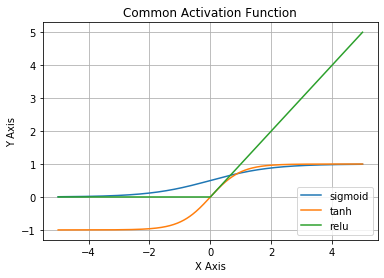

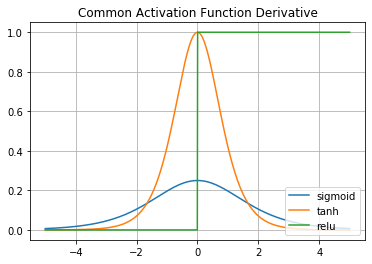

In [33]:
from matplotlib import pylab
import pylab as plt
import numpy as np

def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def tanh(x):
    return (2/(1+np.exp(-2*x))-1)

def relu(x):
    return x * (x>0)

# def leakyRelu(x):
#     if any(x)>0:
        
    

x = plt.linspace(-5,5,1000)

plt.title("Common Activation Function")
plt.plot(x, sigmoid(x), label='sigmoid')
plt.plot(x,tanh(x),label='tanh')
plt.plot(x,relu(x),label='relu')
leakyRelu(x)
# plt.plot(x,leakyRelu(x),label='Leaky relu')

plt.grid()

plt.legend(loc='lower right')


# plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
# plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))
 

plt.xlabel('X Axis')
plt.ylabel('Y Axis')

plt.show()

h = 0.00000001

def derivative(x,y):
    return (x-y)/h
plt.title("Common Activation Function Derivative")
plt.plot(x,derivative(sigmoid(x+h),sigmoid(x)),label='sigmoid')
plt.plot(x, derivative(tanh(x+h),tanh(x)),label='tanh')
plt.plot(x, derivative(relu(x+h),relu(x)),label='relu')
# plt.plot(x, derivative(leakyRelu(x+h),leakyRelu(x)),label='Leaky Relu')

plt.grid()

plt.legend(loc='lower right')

plt.show()



Rita: 0.952
Jake: 0.085


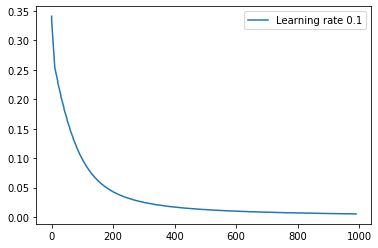

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# def sig(x):
#     return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def sig(x):
    return 1/(1+np.exp(-x))

def der_sig(x):
    fx=sig(x)
    return fx*(1-fx)

# def der_sig(x):
#     fx_i=sig(x+.0001)
#     fx_d=sig(x-.0001)
#     return (fx_i-fx_d)/(2*.0001)

def mse_loss(y_true,y_pred):
    return((y_true-y_pred)**2).mean()

class neural_network:
    def __init__(self):
        self.w1=np.random.normal()
        self.w2=np.random.normal()
        self.w3=np.random.normal()
        self.w4=np.random.normal()
        self.w5=np.random.normal()
        self.w6=np.random.normal()
        self.b1=np.random.normal()
        self.b2=np.random.normal()
        self.b3=np.random.normal()
        
    def feedforward(self,x):
        h1=sig(self.w1*x[0]+self.w2*x[1]+self.b1)
        h2=sig(self.w3*x[0]+self.w4*x[1]+self.b2)
        o1=sig(self.w5*h1+self.w6*h2+self.b3)
        return o1
    def train(self,data,y_trues):
        learn_rate = .05
        epochs=1000
        array_epoch=[]
        array_loss=[]
        
        for epoch in range(epochs):
            for x,y_true in zip(data,y_trues):
                
                sum_h1=self.w1*x[0]+self.w2*x[1]+self.b1
                h1 = sig(sum_h1)
                
                sum_h2=self.w3*x[0]+self.w4*x[1]+self.b2
                h2 = sig(sum_h2)
                
                sum_o1=self.w5*h1+self.w6*h2+self.b3
                o1 = sig(sum_o1)
                
                y_pred=o1
                
                d_l_d_ypred=-2*(y_true-y_pred)
                
                d_ypred_d_w5 = h1*der_sig(sum_o1)
                d_ypred_d_w6 = h2*der_sig(sum_o1)
                d_ypred_d_b3 = der_sig(sum_o1)
                
                d_ypred_d_h1 = self.w5*der_sig(sum_o1)
                d_ypred_d_h2 = self.w6*der_sig(sum_o1)
                
                d_h1_d_w1 = x[0]*der_sig(sum_h1)
                d_h1_d_w2 = x[1]*der_sig(sum_h1)
                d_h1_d_b1 = der_sig(sum_h1)
                
                d_h2_d_w3 = x[0]*der_sig(sum_h2)
                d_h2_d_w4 = x[1]*der_sig(sum_h2)
                d_h2_d_b2 = der_sig(sum_h2)
                
                self.w1 -= learn_rate * d_l_d_ypred*d_ypred_d_h1 * d_h1_d_w1
                self.w2 -= learn_rate * d_l_d_ypred*d_ypred_d_h1 * d_h1_d_w2
                self.b1 -= learn_rate * d_l_d_ypred*d_ypred_d_h1 * d_h1_d_b1
                
                self.w3 -= learn_rate * d_l_d_ypred*d_ypred_d_h2 * d_h2_d_w3
                self.w4 -= learn_rate * d_l_d_ypred*d_ypred_d_h2 * d_h2_d_w4
                self.b2 -= learn_rate * d_l_d_ypred*d_ypred_d_h2 * d_h2_d_b2
                
                self.w5 -= learn_rate * d_l_d_ypred*d_ypred_d_w5
                self.w6 -= learn_rate * d_l_d_ypred*d_ypred_d_w6
                self.b3 -= learn_rate * d_l_d_ypred*d_ypred_d_b3
                
                if epoch %10 == 0:
                    y_preds = np.apply_along_axis(self.feedforward,1,data)
                    loss = mse_loss(y_trues, y_preds)
                  #  print ("Epoch %d loss: %.3f" % (epoch, loss))
                    array_epoch.append (epoch)
                    array_loss.append(loss)
        return array_epoch, array_loss
data = np.array ([
    [-2,-1],
    [25,6],
    [17,4],
    [-15,-6]
])

y_trues = np.array ([1,
                    0,
                    0,
                    1])

np.random.seed (1000)

network = neural_network ()
arr_epoch, arr_loss = network.train (data, y_trues)

rita = np.array ([-7,-3])
jake = np.array ([20,2])

print ("Rita: %.3f" % network.feedforward(rita))
print ("Jake: %.3f" % network.feedforward(jake))

plt.plot(arr_epoch, arr_loss, label = "Learning rate 0.1")
plt.legend(loc='upper right')
